# Binary classification with DNN / Phân loại nhị phân bằng DNN

## Import motdules

In [210]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Binary Classification

In [211]:
df = pd.read_csv('../data/diabetes2.csv')
# Xoá những dòng nào có ô không có giá trị (NA)
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [213]:
# import seaborn as sns
# sns.pairplot(df, hue = 'TenYearCHD')

In [214]:
X = df.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [215]:
y = df['Outcome']

## Train test split

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,
                                                    test_size=0.2,
                                                    random_state=10)
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [218]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

## Early Stopping

In [219]:
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)

## Tạo model

In [230]:
model = Sequential()
model.add(Dense(32, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(8, activation='tanh'))
# model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = Adam(learning_rate=0.05), loss = 'binary_crossentropy', metrics=['accuracy'])

## Train model

In [231]:
model.fit(X_train, y_train, epochs=100, verbose=1, batch_size = 0)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6592 - accuracy: 0.6238
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6049 - accuracy: 0.6645
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5794 - accuracy: 0.6889
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5299 - accuracy: 0.7362
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5350 - accuracy: 0.7101
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5126 - accuracy: 0.7410
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5288 - accuracy: 0.7248
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5459 - accuracy: 0.7134
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5042 - accuracy: 0.7622
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4961 - accuracy: 0.7622
Epoch 11/

20/20 [==============================] - 0s 5ms/step - loss: 0.4510 - accuracy: 0.7964
Epoch 84/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4556 - accuracy: 0.7736
Epoch 85/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4570 - accuracy: 0.7883
Epoch 86/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4790 - accuracy: 0.7606
Epoch 87/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4624 - accuracy: 0.7850
Epoch 88/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4418 - accuracy: 0.7915
Epoch 89/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4453 - accuracy: 0.7964
Epoch 90/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4560 - accuracy: 0.7834
Epoch 91/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4692 - accuracy: 0.7980
Epoch 92/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4604 - accuracy: 0.7834
Epoch 93/100


In [232]:
# tính loss và accuracy (metrics)
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: " + str(loss));
print("Accuracy: " + str(accuracy));

5/5 [==============================] - 0s 5ms/step - loss: 0.4936 - accuracy: 0.7727
Loss: 0.49360066652297974
Accuracy: 0.7727272510528564


In [233]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [234]:
y_train_pred = model.predict(X_train) > 0.5
y_test_pred = model.predict(X_test) > 0.5

print("The Accuracy score on the Train set is: " + str(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is: " + str(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is: 0.7931596091205212
The Accuracy score on the Test set is: 0.7727272727272727


In [236]:
confusion_matrix(y_test, y_test_pred)

array([[75, 20],
       [15, 44]], dtype=int64)

In [237]:
model.predict(X_test)

array([[0.7630706 ],
       [0.52736837],
       [0.47209284],
       [0.07366961],
       [0.2360732 ],
       [0.003049  ],
       [0.05597292],
       [0.5060692 ],
       [0.11369789],
       [0.24412018],
       [0.11599237],
       [0.44817284],
       [0.9426036 ],
       [0.30513695],
       [0.27931678],
       [0.7542879 ],
       [0.86009926],
       [0.08213224],
       [0.09531748],
       [0.95937705],
       [0.48988965],
       [0.50257736],
       [0.29738617],
       [0.5777857 ],
       [0.25954115],
       [0.87020147],
       [0.29247466],
       [0.09531748],
       [0.798179  ],
       [0.92280376],
       [0.28660807],
       [0.0087525 ],
       [0.01104203],
       [0.17528133],
       [0.5575858 ],
       [0.15679292],
       [0.28660807],
       [0.36678323],
       [0.90821934],
       [0.03765149],
       [0.34539926],
       [0.28660807],
       [0.7499456 ],
       [0.38068262],
       [0.7671312 ],
       [0.18260929],
       [0.6879465 ],
       [0.042

In [241]:
from sklearn.metrics import auc, roc_curve, classification_report
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test), pos_label=1)
auc(fpr, tpr)

0.8344335414808206

In [244]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        95
           1       0.69      0.75      0.72        59

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.77      0.77       154



Text(0, 0.5, 'True positive rate (Sensitivity)')

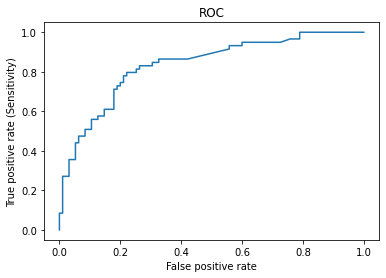

In [239]:
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate (Sensitivity)')